# EXTRA CREDIT HOMEWORK 

In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal
import seaborn as sns; sns.set()
from demo import fairness_demo

# Problem 1  [25 points]
Consider the four datasets returned from the function get_dataset($d$) for $d=2,3,4, \& \;5$. Here $d$ is the dimensionality of the non-sensitive covariates, which are returned in the matrix $X$, whereas the vectors $y$ and $x_{\rm{sensitive}}$ store the target labels and sensitive covariate, respectively. (As such the structure of the data is exactly analagous to what we have in the fairness demo notebook from the lecture.)

In [16]:
def get_gaussian_data(mean, cov, class_label, n_samples):
    nv = multivariate_normal(mean = mean, cov = cov)
    X = nv.rvs(n_samples)
    y = np.ones(n_samples, dtype=float) * class_label
    return X,y

### this function returns the dataset
### e.g. X, y, x_sensitive = get_dataset(2)

def get_dataset(d):
    np.random.seed(5)
    mu1 = 0.5*np.ones(d)
    mu2 = -0.5*np.ones(d)
    sigma1 = np.eye(d)
    sigma2 = np.eye(d)
    X1, y1 = get_gaussian_data(mu1, sigma1, 1, 10000*d) # positive class
    X2, y2 = get_gaussian_data(mu2, sigma2, -1, 10000*d) # negative class

    X = np.vstack((X1, X2)) # non-sensitive covariates
    y = np.hstack((y1, y2)) # class labels
    x_sensitive = np.ones(X.shape[0])
    x_sensitive[X[:,0]<0.0] = 0 # sensitive covariate; 
                                # 0 is the protected class, 1 is the non-protected class
    return X, y, x_sensitive

In [17]:

def train_and_plot(X,y,x_sensitive,fairness_constraint):
    fd_unconstrained=fairness_demo(); 
    fd_constrained=fairness_demo(); 
    
    ### here we train the unconstrained classifier (as specified by the final argument of -1.0)
    ### the train function returns the following:
    ### w = the vector of weights that defines the decision boundary
    ### p_rule = the p%-rule ratio that quantifies adverse impact to the protected class
    ### accuracy = the prediction accuracy of the classifier on the training set w.r.t. the target labels
    w_unconstrained, p_rule_unconstrained, accuracy_unconstrained = fd_unconstrained.train(X,y,x_sensitive,-1.0)  

    ### here we train the fairness-constrained classifier (as specified by the final argument)
    w_constrained, p_rule_constrained, accuracy_constrained = fd_constrained.train(X,y,x_sensitive,fairness_constraint)

    fig, ((axA, axB)) = plt.subplots(nrows=1, ncols=2,figsize=(12,8))
    print("dataset size:  %d" % len(x_sensitive))
    print("number of protected members:  %d" % (len(x_sensitive)-np.sum(x_sensitive)))
    print("w_unconstrained: ",w_unconstrained)
    print("w_constrained:   ",w_constrained)
    print("p% rule ratio",p_rule_unconstrained/p_rule_constrained*100.0,"%")
    print("p_rule_unconstrained:    %2.1f%%    p_rule_constrained:    %2.1f%%" % (p_rule_unconstrained,p_rule_constrained))
    print("accuracy_unconstrained:  %2.1f%%    accuracy_constrained:  %2.1f%%" % (accuracy_unconstrained, accuracy_constrained))
    fd_unconstrained.plot(axA)
    fd_constrained.plot(axB)
    return (accuracy_unconstrained, accuracy_constrained)

# part a)  [10 points]
Using the logistic regression classifier provided by the python class fairness_demo (just like in the lecture notebook) calculate the accuracy and p%-rule ratio for all four datasets using the unconstrained classifier (i.e. no fairness constraints are imposed).

For d=2
dataset size:  40000
number of protected members:  19915
w_unconstrained:  [-0.01098574  0.97316927  0.97211999]
w_constrained:    [-0.01098146  0.97316965  0.97212093]
p% rule ratio 100.0 %
p_rule_unconstrained:    26.8%    p_rule_constrained:    26.8%
accuracy_unconstrained:  75.6%    accuracy_constrained:  75.6%
For d=3
dataset size:  60000
number of protected members:  29988
w_unconstrained:  [-0.00140732  1.01674329  1.00465641  0.98328058]
w_constrained:    [-0.00140904  1.01674389  1.00465558  0.98328062]
p% rule ratio 100.0 %
p_rule_unconstrained:    33.7%    p_rule_constrained:    33.7%
accuracy_unconstrained:  80.7%    accuracy_constrained:  80.7%
For d=4
dataset size:  80000
number of protected members:  40122
w_unconstrained:  [ 0.00182327  0.99141285  0.9950936   0.9984824   0.99469025]
w_constrained:    [ 0.00182204  0.99141374  0.99509444  0.99848371  0.99469288]
p% rule ratio 100.0 %
p_rule_unconstrained:    36.9%    p_rule_constrained:    36.9%
accuracy_unconst

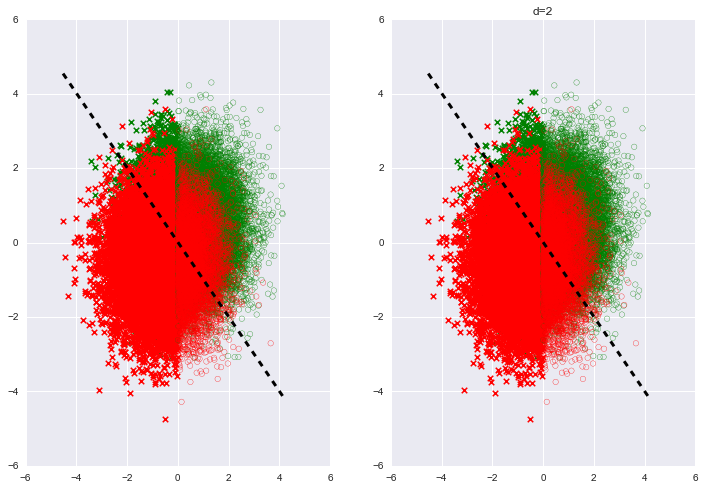

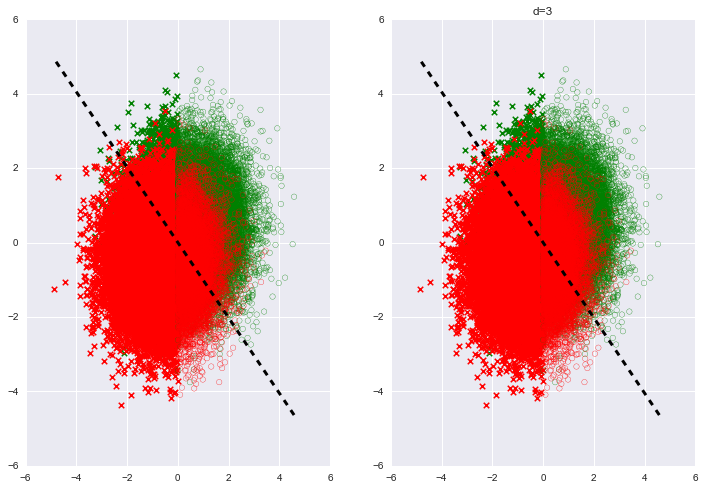

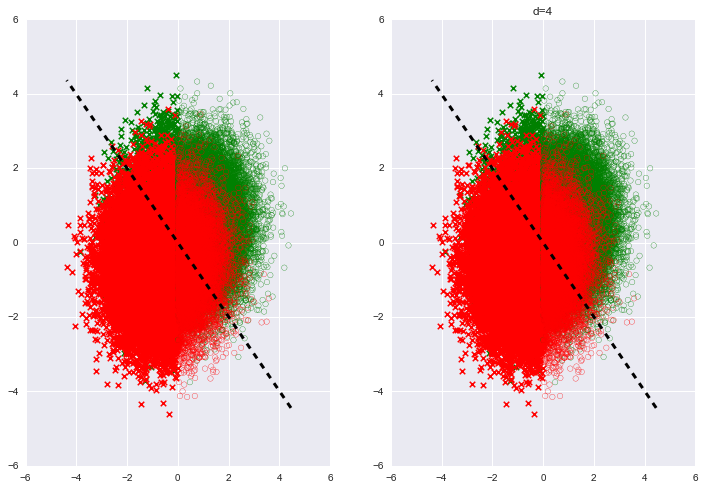

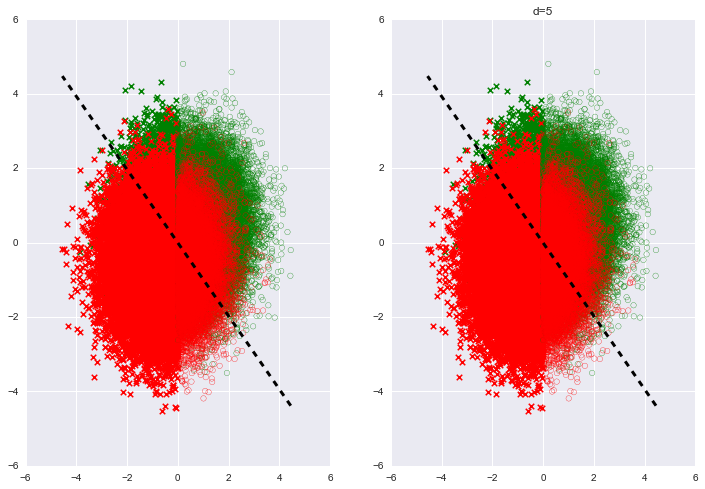

In [18]:
d = []
for i in range(2,6):
    print ("For d="+str(i))
    accuracy = train_and_plot(*get_dataset(i),fairness_constraint=-1)
    d.append(accuracy)
    plt.title("d="+str(i))

# part b) [10 points]
Note that for all four datasets the "four-fifths rule" is very much not satisfied. For each dataset impose the minimum fairness constraint such that the four-fiths rule is satisfied. What is the loss in accuracy for each dataset as compared to the unconstrained classifier performance?

For d=2
dataset size:  40000
number of protected members:  19915
w_unconstrained:  [-0.01098574  0.97316927  0.97211999]
w_constrained:    [-0.00090718 -0.04958226  0.74096195]
p% rule ratio 33.1794317682 %
p_rule_unconstrained:    26.8%    p_rule_constrained:    80.8%
accuracy_unconstrained:  75.6%    accuracy_constrained:  67.6%
loss in accuracy
-7.965


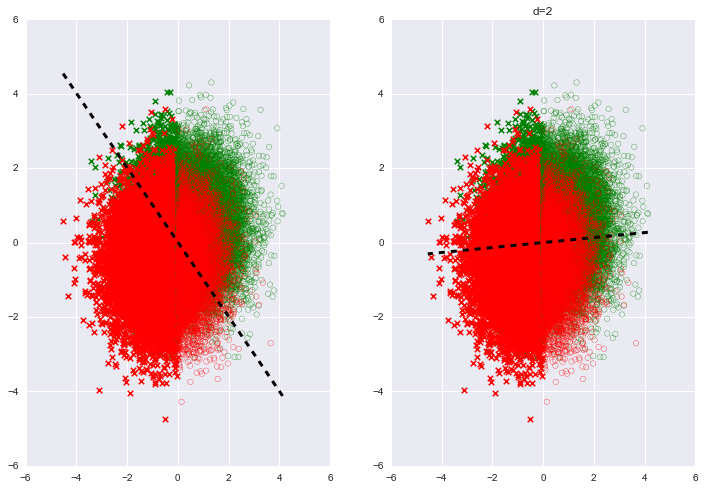

In [19]:
#d = 2
#0.365
i = 2
print ("For d="+str(i))
accuracy_cons2 = train_and_plot(*get_dataset(i),fairness_constraint=0.05)
print ('loss in accuracy')
print (accuracy_cons2[1] - d[0][1])
plt.title("d="+str(i))

For d=3
dataset size:  60000
number of protected members:  29988
w_unconstrained:  [-0.00140732  1.01674329  1.00465641  0.98328058]
w_constrained:    [-0.00195606 -0.16335834  0.72537116  0.71406773]
p% rule ratio 41.5965910142 %
p_rule_unconstrained:    33.7%    p_rule_constrained:    80.9%
accuracy_unconstrained:  80.7%    accuracy_constrained:  73.2%
loss in accuracy
-7.54166666667


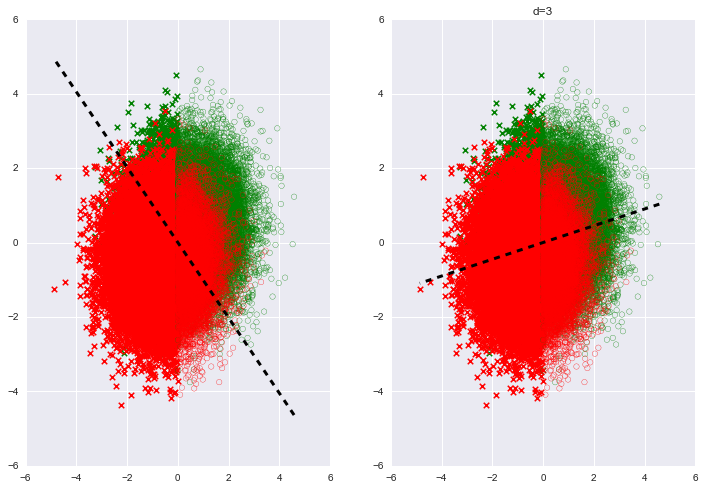

In [41]:
#d = 3
i = 3
print ("For d="+str(i))
accuracy_cons2 = train_and_plot(*get_dataset(i),fairness_constraint=0.065)
print ('loss in accuracy')
print (accuracy_cons2[1] - d[i-2][1])
plt.title("d="+str(i))

For d=4
dataset size:  80000
number of protected members:  40122
w_unconstrained:  [ 0.00182327  0.99141285  0.9950936   0.9984824   0.99469025]
w_constrained:    [-0.00675534 -0.29803256  0.68880294  0.69328054  0.68576401]
p% rule ratio 46.0367161552 %
p_rule_unconstrained:    36.9%    p_rule_constrained:    80.1%
accuracy_unconstrained:  84.1%    accuracy_constrained:  76.5%
loss in accuracy
-7.57875


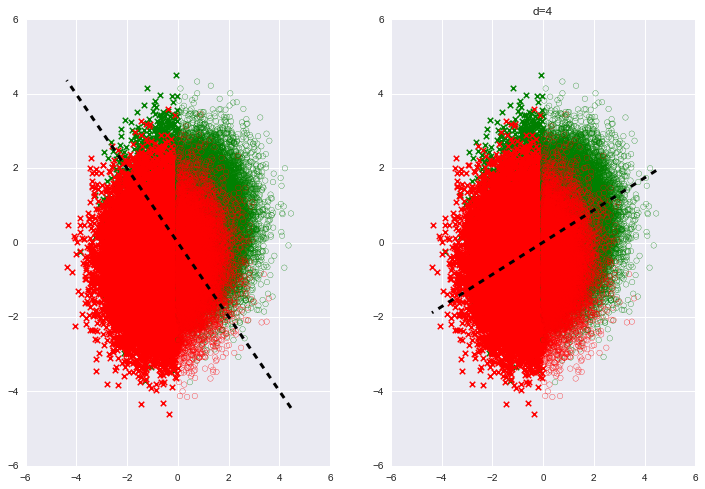

In [26]:
#d = 3
i = 4
print ("For d="+str(i))
accuracy_cons2 = train_and_plot(*get_dataset(i),fairness_constraint=0.07)
print ('loss in accuracy')
print (accuracy_cons2[1] - d[i-2][1])
plt.title("d="+str(i))

For d=5
dataset size:  100000
number of protected members:  50013
w_unconstrained:  [ 0.00686279  0.99208532  1.00856432  1.00027427  0.98766854  1.00906238]
w_constrained:    [ 0.0031945  -0.42470797  0.66706912  0.65842253  0.65708232  0.66933784]
p% rule ratio 48.9990429419 %
p_rule_unconstrained:    39.3%    p_rule_constrained:    80.2%
accuracy_unconstrained:  86.9%    accuracy_constrained:  79.0%
loss in accuracy
-7.971


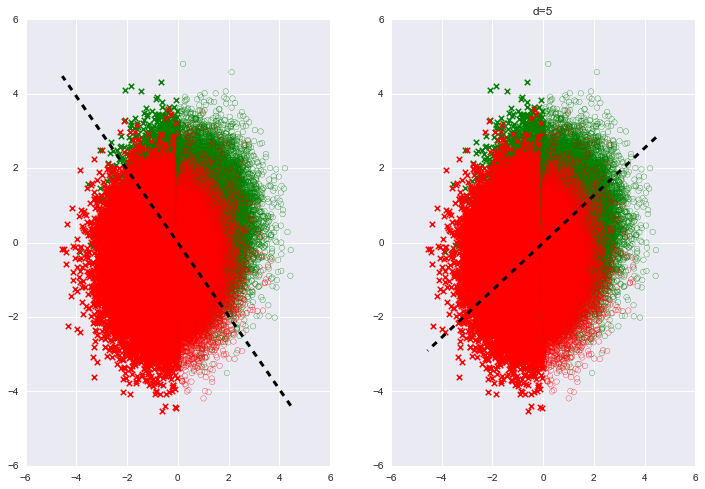

In [39]:
#d = 3
i = 5
print ("For d="+str(i))
accuracy_cons2 = train_and_plot(*get_dataset(i),fairness_constraint=0.07)
print ('loss in accuracy')
print (accuracy_cons2[1] - d[i-2][1])
plt.title("d="+str(i))

For d=6
dataset size:  120000
number of protected members:  59992
w_unconstrained:  [-0.00108548  0.99771861  0.99543009  0.99512967  1.00802609  0.99684341
  1.00952492]
w_constrained:    [-0.00553362 -0.53953656  0.63670738  0.63001689  0.64259134  0.62853113
  0.64412144]
p% rule ratio 51.0078530997 %
p_rule_unconstrained:    40.9%    p_rule_constrained:    80.1%
accuracy_unconstrained:  89.1%    accuracy_constrained:  80.7%
loss in accuracy


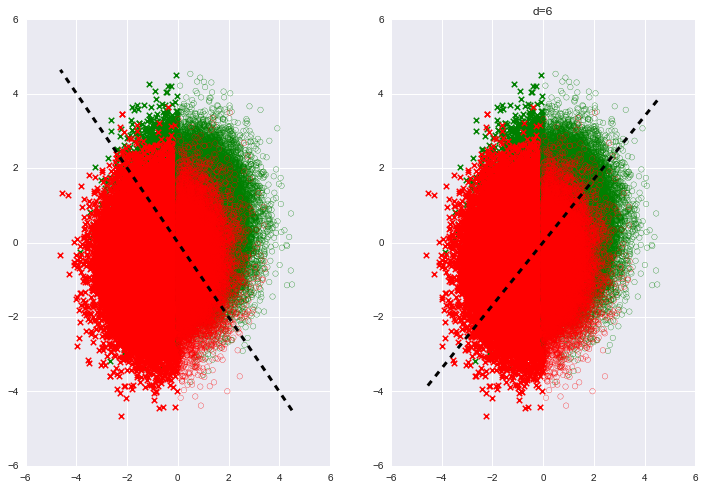

In [46]:
i = 6
print ("For d="+str(i))
accuracy_cons2 = train_and_plot(*get_dataset(i),fairness_constraint=0.065)
print ('loss in accuracy')
#print (accuracy_cons2[1] - d[i-2][1])
plt.title("d="+str(i))

For d=7
dataset size:  140000
number of protected members:  70159
w_unconstrained:  [-0.00139005  0.99082824  0.98435796  0.98585256  1.00890114  0.99091468
  1.01185129  0.99027831]
w_constrained:    [ 0.00260847 -0.66374309  0.60976119  0.60531658  0.62518825  0.60580477
  0.62533598  0.61834945]
p% rule ratio 52.1514785546 %
p_rule_unconstrained:    41.8%    p_rule_constrained:    80.2%
accuracy_unconstrained:  90.6%    accuracy_constrained:  82.0%
loss in accuracy


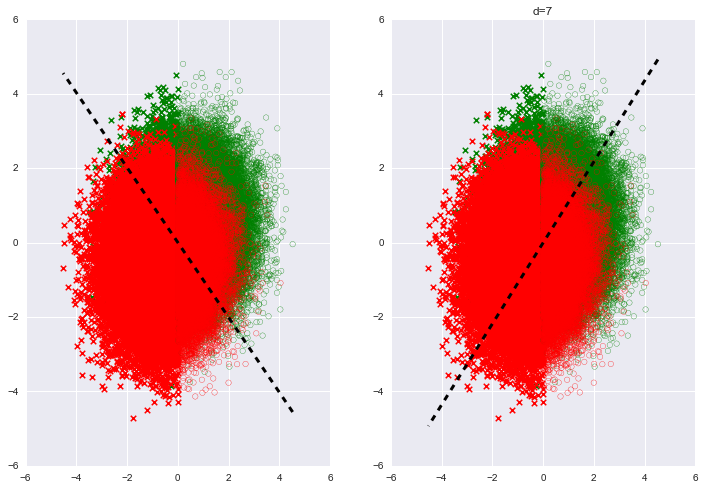

In [51]:
i = 7
print ("For d="+str(i))
accuracy_cons2 = train_and_plot(*get_dataset(i),fairness_constraint=0.055)
print ('loss in accuracy')
#print (accuracy_cons2[1] - d[i-2][1])
plt.title("d="+str(i))

# part c) [5 points]
Notice that (as least as far as the four datasets for $d=2,3,4, \& \;5$ are concerned) as the dimension $d$ increases  the following things happen:

- the accuracy increases
- the p%-rule ratio for the unconstrained classifier increases
- the accuracy losses as calculated in part b decrease (at least approximately up to fluctuations)

Look at the function get_dataset($d$) and consider how the generated dataset changes as a function of $d$. Do you expect the behavior described above to continue for all values of $d>5$? If so, explain why. If not, explain why not.
<br><br>

Yes, because the data, has more datapoints that are normally distributed, with opposite labels forming less distinct groups(more spread out), so that even though there is a majority, minority split, the SVM support vector can shift by a little margin - less constraint is also required to bring about that level of accuracy and p%rule.

# Problem 2  [10 points]

Read the following review by Barocas and Selbst (or as much of the review as you find interesting):

http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2477899

Answer the following questions on the basis of what you've read.

# part a)

Consider the logic underlying the "fairness aware" classifier we explored in the previous problem. Consider the principle of nondiscrimination versus the principle of antisubordination. Which (if any) of the two principles is more in line with the approach taken by the algorithm? Why?

# part b)

Consider the "fairness aware" classifier we explored in the previous problem. In itself does it offer a solution to the problem of "masking" as described in the review?
<br><br>

A. It is a case of antisubordination, as we are trying to prevent discrimation by applying constraint on and within the class that's created by a random normal function, and not manipulating the datapoints that are present by a random normal function

B. Yes because it is fairness constrained, and we can see that how accuracy and p% ratio moves to adjust fariness. Anyone drawing intentional conclusions or masking their intentional decisions from this dataset can have the idea when it is 4-5th compliant and when not. Masking usually is something that creates problems in detection of prejudices or discrimination and this is pretty open way to get statistics about a classifier doing something on the data. 

# Problem 3  [5 points]

Consider the following illustration of a dataset in which the positive target labels are marked with plus signs, the green points constitute the non-protected class, and the blue points constitute the protected class. The distribution of the non-protected class is illustrated on the left, the distribution of the protected class is illustrated in the middle, and the graphic on the right shows the combined dataset.

<img src="dataset.png">

Consider applying the "fairness aware" classifier in Problem 1 to the combined dataset, imposing fairness constraints such that the four-fifths rule is satisfied. Do you expect the loss of accuracy as you go from the unconstrained to the constrained classifier to be large or small? Why?


<br><br>

The slope of the line separating will be somewhere betweent the majority and minority lines. Currently , when 80% rule is not present the support vectors will be biased towards the majority data, so shifting the line will bring about a significant(visible) accuracy change.

# Problem 4  [15 points]
#### (This is question 2.2 from Dunning's book)

In a study of the effect of police presence on the incidence of crime, Di Tella and Schargrodsky (2004) write:

“Following a terrorist attack on the main Jewish center in Buenos Aires, Argentina, in July
1994, all Jewish institutions received police protection… Because the geographical
distribution of these institutions can be presumed to be exogenous in a crime regression, this hideous event constitutes a natural experiment.”

The authors find that blocks which were allocated extra police forces due to the presence of a Jewish institution experienced lower motor vehicle theft rates.  The control group consists of blocks in the same neighborhoods that do not have Jewish institutions.

Answer the following three questions __in at least 6-10 sentences__.

### part a) 

What do the authors mean by “presumed exogenous in a crime regression” and what is the relationship to as-if random assignment?  
### part b) 
What are some potential threats to as-if random assignment?  [give at least two examples of potential threats]
### part c) 
How might these threats be evaluated empirically?
<br><br><br><br>

a.Exogenous in a crime regression means that the placement of these institutions was brought about by external factors, say presence of more Jews at a  location would justify having a Jewish center in the same location. There is a causal connection, between the attack and presence of Jewish center. The mention of as-if random assignment because the allocation of police forces is to be seen, was caused by the attack or not and hence a treatment and control group selected at random is important to be a natural experiment wished to be performed. The control group consists of blocks in the same neighborhoods that do not have Jewish institutions if differs largely from the treatment group will not be random, and likely to suffer from not being a natural experiment

b. As explained in the lecture, It may not give answers to question of interest and detailed knowledge of the topic at low levels is difficult to be segregated at higher levels. Also design of a natural experiment, if not implemented right can give away the purpose of a natural experiment.

c.

In the lecture, the Balance Tests discussed were

I Examine balance of pre-treatment covariates in treatment/control groups
-this would be performing tests on the as-if random data, to check for covariates

II Dealing with multiple comparisons if there are lots of covariates

# Problem 5  [45 points]
Consider the Titanic dataset below

In [2]:
from sklearn.cross_validation import train_test_split
dataset =pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/Bonus/titanic3.csv");
print("Here are the first three rows:")
dataset.iloc[0:3,:]

Here are the first three rows:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
dataset = dataset[['age','sex','pclass','sibsp','parch','survived']]

dataset = dataset.dropna()
dataset['sex'] = map(lambda x: 0 if x == 'male' else 1, dataset['sex'])

In [4]:
#age, sex, pclass, sibsp, and parch as features
data_X = dataset[['age','sex','pclass','sibsp','parch']]
data_y = dataset['survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.20, random_state=1)

In [6]:
#X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train, test_size=0.25,random_state=42)

## Data dictionary
NAME: titanic3<br>
SIZE: 1309 Passengers, 14 Variables<br><br>

VARIABLE DESCRIPTIONS<br>
Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) <br>
survival: Survival (0 = No; 1 = Yes)<br>
name: Name<br>
sex: Sex<br>
age: Age<br>
sibsp: Number of Siblings/Spouses Aboard<br>
parch: Number of Parents/Children Aboard<br>
ticket: Ticket Number<br>
fare: Passenger Fare (British pound)<br>
cabin: Cabin<br>
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
boat: Lifeboat<br>
body: Body Identification Number<br>
home.dest: Home/Destination

# part a) [30 points]

Your goal is to train a classifier for the binary attribute “survival" using age, sex, pclass, sibsp, and parch as features. You will do so using three different machine learning techniques:

i) Naive Bayes Classification. [10 points]

ii) Support Vector Machine. Try a linear SVM with soft margins as well as kernel SVM with polynomial and Gaussian kernels. Make sure to use a validation set to choose hyperparameters for each model where applicable. [10 points]

iii) Random Forest Classification. [10 points]

For each of the three models report out-of-sample accuracy--in order to do so, you will of course need to split the dataset into a training dataset and a test dataset.

# part b)  [15 points]

Repeat the exercise in part a, this time using cross validation. Report the mean accuracy for each model after doing 10 random splits of the data into train and test sets.

In [57]:
from sklearn.naive_bayes import GaussianNB
clf_gauss = GaussianNB()
clf_gauss.fit(X_train, y_train)
pred = clf_gauss.predict(X_test)


print ("On Test")
print(100.0*(list(pred==y_test).count(True))/len(y_test))


On Test
80.4761904762


### SVM

In [7]:
from sklearn import svm

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [9]:
from sklearn import svm
# fit the model

clf_svmLin = svm.SVC(kernel='linear',C=0.0155) # as we use linear svm we specify a linear kernel (see below what does it mean)
clf_svmLin.fit(X_train, y_train)
pred = clf_svmLin.predict(X_val)
pred1 = clf_svmLin.predict(X_test)
print ("On validation")
print(100.0*(list(pred==y_val).count(True))/len(y_val))
print ("On test")
print(100.0*(list(pred1==y_test).count(True))/len(y_test))

On validation
77.5119617225
On test
79.5238095238


In [15]:
clf_svmPoly = svm.SVC(kernel='poly',C=0.0001) # as we use linear svm we specify a linear kernel (see below what does it mean)
clf_svmPoly.fit(X_train, y_train)
pred = clf_svmPoly.predict(X_val)

print ("On validation")
print(100.0*(list(pred==y_val).count(True))/len(y_val))
print ("On test")
print(100.0*(list(pred1==y_test).count(True))/len(y_test))

On validation
80.8612440191
On test
79.5238095238


In [52]:
clf_svmRbf = svm.SVC(kernel='rbf',C=1) # as we use linear svm we specify a linear kernel (see below what does it mean)
clf_svmRbf.fit(X_train, y_train)
pred = clf_svmRbf.predict(X_val)
pred1 = clf_svmRbf.predict(X_test)
print ("On validation")
print(100.0*(list(pred==y_val).count(True))/len(y_val))
print ("On test")

print(100.0*(list(pred1==y_test).count(True))/len(y_test))

On validation
80.8612440191
On test
80.4761904762


# Random Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf_Rand = RandomForestClassifier(n_jobs=-1,n_estimators=700)
clf_Rand.fit(X_train,y_train)
pred = clf_Rand.predict(X_val)
pred1 = clf_Rand.predict(X_test)
print ("On validation")
print(100.0*(list(pred==y_val).count(True))/len(y_val))
print ("On test")
print(100.0*(list(pred1==y_test).count(True))/len(y_test))


On validation
78.9473684211
On test
80.4761904762


# Cross Validation

In [55]:
from sklearn.cross_validation import cross_val_score
data_X = dataset[['age','sex','pclass','sibsp','parch']]
data_y = dataset['survived']


In [58]:
#GaussianNB
new_modelGauss = cross_val_score(clf_gauss,data_X, data_y,cv=10,scoring='accuracy')
print('This is mean of all 10 splits',new_modelGauss.mean()*100.0)

This is mean of all 10 splits 71.2156193321


In [60]:
#SVM-Lin
new_modelSVMLin = cross_val_score(clf_svmLin,data_X, data_y,cv=10,scoring='accuracy')
print('This is mean of all 10 splits',new_modelSVMLin.mean()*100.0)

This is mean of all 10 splits 78.0718108752


In [61]:
#SVM-Poly
new_modelSVMPoly = cross_val_score(clf_svmPoly,data_X, data_y,cv=10,scoring='accuracy')
print('This is mean of all 10 splits',new_modelSVMPoly.mean()*100.0)

This is mean of all 10 splits 77.8711902984


In [62]:
#SVM-RBF
new_modelSVMRbf = cross_val_score(clf_svmRbf,data_X, data_y,cv=10,scoring='accuracy')
print('This is mean of all 10 splits',new_modelSVMRbf.mean()*100.0)

This is mean of all 10 splits 76.4481489384


In [63]:
#RandForest
new_modelRandF = cross_val_score(clf_Rand,data_X, data_y,cv=10,scoring='accuracy')
print('This is mean of all 10 splits',new_modelRandF.mean()*100.0)

This is mean of all 10 splits 73.7667413493
